# Convex Hull
> 주어진 점들을 포함하는 가장 작은 볼록 다각형

<br/>
<br/>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = (8,6)

<br/>
<br/>
<br/>
<br/>

## Data

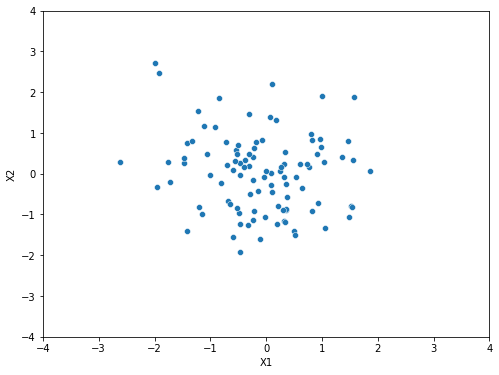

In [2]:
np.random.seed(42)

df = pd.DataFrame({
    'X1' : np.random.randn(100),
    'X2' : np.random.randn(100)
})


sns.scatterplot('X1', 'X2', data = df)
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.show()

<br/>
<br/>
<br/>
<br/>

## Convex Hull 꼭지점
- 결과의 인덱스 순서대로 꼭지점을 이으면 Convex Hull이 그려짐

In [3]:
from scipy.spatial import ConvexHull

ch = ConvexHull(df)

print(ch.vertices)

[79 74 23 10 47 82 31  6]


<br/>
<br/>

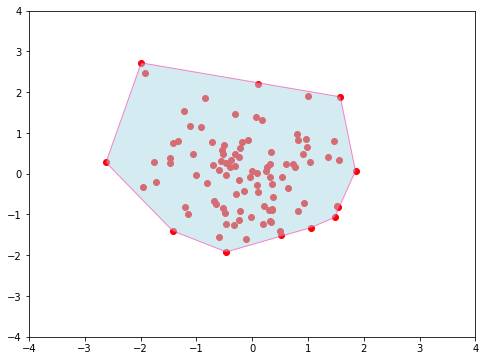

In [4]:
from matplotlib.patches import Polygon


# 다각형 생성
p = Polygon(df.loc[ch.vertices, :],
            closed=True,
            edgecolor = 'deeppink',
            facecolor = 'lightblue',
            alpha = 0.5)

fig, ax = plt.subplots()

# plot
ax.add_patch(p)
ax.scatter(df['X1'], df['X2'], c = 'red')

ax.set_xlim(-4,4)
ax.set_ylim(-4,4)
plt.show()

<br/>
<br/>
<br/>
<br/>

## new data가 hull 안에 포함되는지 확인

In [5]:
from scipy.spatial import Delaunay

def in_hull(p, hull):
    """
    Test if points in `p` are in `hull`

    `p` should be a `NxK` coordinates of `N` points in `K` dimensions
    `hull` is either a scipy.spatial.Delaunay object or the `MxK` array of the 
    coordinates of `M` points in `K`dimensions for which Delaunay triangulation
    will be computed
    """
    if not isinstance(hull,Delaunay):
        hull = Delaunay(hull)

    return hull.find_simplex(p)>=0

# 새로운 데이터 생성 (100개)
new_data = np.random.randn(200).reshape(-1, 2)

# 결과
result = in_hull(new_data, df)
print(result)

[ True  True  True  True False  True  True  True  True  True False False
  True  True  True  True  True False  True  True  True  True  True  True
  True  True False  True  True  True  True False  True False  True False
  True  True  True  True  True False False  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True False  True  True  True  True  True  True  True  True  True  True
  True  True  True False  True False  True False  True  True  True  True
  True  True  True  True]


<br/>
<br/>

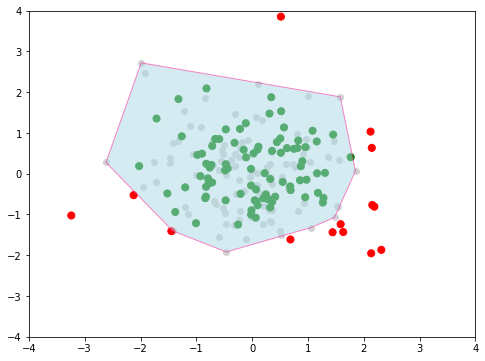

In [6]:
from matplotlib.patches import Polygon

# 다각형 생성
p = Polygon(df.loc[ch.vertices, :],
            closed=True,
            edgecolor = 'deeppink',
            facecolor = 'lightblue',
            alpha = 0.5)

colors = {False : 'red', True : 'green'}
colors = [colors[r] for r in result]

fig, ax = plt.subplots()

# plot
ax.add_patch(p)
ax.scatter(df['X1'], df['X2'], c = 'lightgray')

# hull 안에 포함 여부에 따라 색깔 구분
# green : 포함
# red : 포함x
ax.scatter(new_data[:, 0], new_data[:, 1], c = colors, s = 50)


ax.set_xlim(-4,4)
ax.set_ylim(-4,4)
plt.show()